# Kmeans with library

In [1]:
from google.colab import drive
drive.mount('/content/drive')

basicpath = '/content/drive/MyDrive/Univ/4-1/Data Science/Practice/12주차/'

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
file = 'input_library.csv'

data = pd.read_csv(os.path.join(basicpath, file), index_col=None)

## 데이터 확인

In [4]:
data.head(10)

,x,y
0,40.169678,7.529327
1,15.040789,19.121220
2,12.907942,27.272168
3,44.258823,11.844700
4,32.404005,37.238491
5,11.591989,30.907491
6,29.806420,51.450404
7,30.487456,46.869026
8,19.039982,14.783329
9,10.634248,11.455458


In [5]:
x = data['x']
y = data['y']

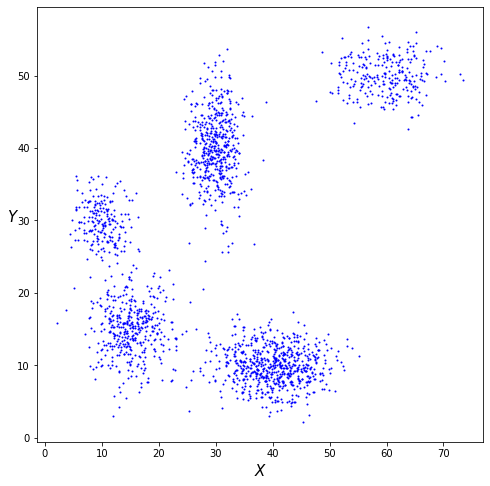

In [6]:
plt.figure(figsize=[8, 8])
plt.scatter(x, y, s=1, c='b')
plt.xlabel("$X$", fontsize=15)
plt.ylabel("$Y$", fontsize=15, rotation=0)
plt.show()

## Scikit-learn을 통한 모델 학습
sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='deprecated', verbose=0, random_state=None, copy_x=True, n_jobs='deprecated', algorithm='auto')

In [7]:
from sklearn.cluster import KMeans

In [20]:
# n_init = random하게 10번 다시 시도해봤다.
# 그중에서 goodness function에 기반해서 가장 좋은거 뽑아

# max_iter 수렴 했는데 계속 돌리는건 의미 없으니까 max epoch 설정

model = KMeans(n_clusters=5, init='random', algorithm='full', n_init=1)
# initialize point가 random해서 local minimum에 빠질 수 있어


# default는 k-means++, k-means에서 initialize를 좀 다르게 하는거야
# k-means++는 처음에 5 포인트를 한번에 뽑는게 아니라. 1포인트를 뽑고, 그 포인트에서 가장 먼 포인트를 뽑아, 그 2개에서 가장 먼 포인트를 뽑아.. 그렇게 먼 포인트를 계속 뽑는거야
# 이렇게 하면 outlier가 그 포인트로 뽑힐 수도 있지만.. k-means에서 random하게 뽑는 것 보다는 좋아
# 옛날엔 k-means 맨날 썼는데, 2~3년전 부터 k-means++를 쓴대
# model = KMeans(n_clusters=5)

model.fit(data.values)

# Clustering분야는 정답이 없기에, 이렇게 되어야만 한다.. 처럼 휴리스틱하게 생각한 것이 많아서
# break through인 알고리즘이 새롭게 나오기가 어려워, 그래서 80년도에 나온 오래된 kmeans가 아직도 현역인거야

KMeans(algorithm='full', init='random', n_clusters=5, n_init=1)

In [15]:
model.labels_
# 0번째 데이터는 0번째 클러스터에
# 1번째 데이터는 4번째 클러스터에

array([0, 4, 2, ..., 3, 1, 1], dtype=int32)

## 모델 test

In [12]:
plt.cm.gist_rainbow

In [13]:
unique_labels = set(model.labels_)
colors = [plt.cm.gist_rainbow(each) for each in np.linspace(0, 1, len(unique_labels))]

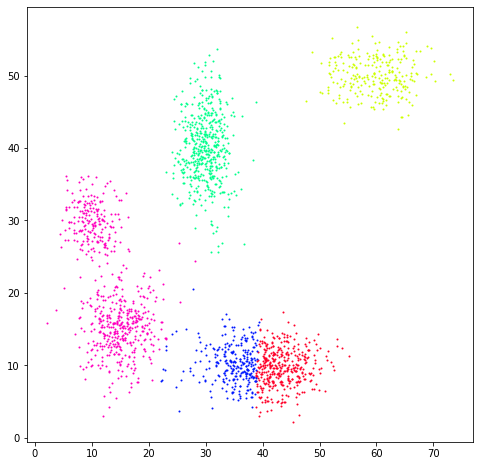

In [21]:
plt.figure(figsize=[8, 8])
for cluster_index, col in zip(unique_labels, colors):
    if cluster_index == -1:
        col = [0, 0, 0, 1]
    class_mask = (model.labels_ == cluster_index)
    plt.plot(data.values[class_mask][:, 0], 
             data.values[class_mask][:, 1], 
            'o', markerfacecolor=tuple(col), markeredgecolor=tuple(col), 
            markersize=1)